In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [5]:
file_path = '../Data/fa_monthly_93_22_ireland.nc'

# Open the NetCDF file using xarray
dataset = xr.open_dataset(file_path)
dataset

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 42, time: 360)
Coordinates:
  * longitude  (longitude) float32 -10.4 -10.3 -10.2 -10.1 ... -5.8 -5.7 -5.6
  * latitude   (latitude) float32 55.4 55.3 55.2 55.1 ... 51.6 51.5 51.4 51.3
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2022-12-01
Data variables:
    fal        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-14 18:44:45 GMT by grib_to_netcdf-2.24.0: /opt/ecmw...

In [12]:
# New xarray where all water values are now NaN
land_dataset = dataset['fal'].where(dataset['fal'] != 0, np.nan)

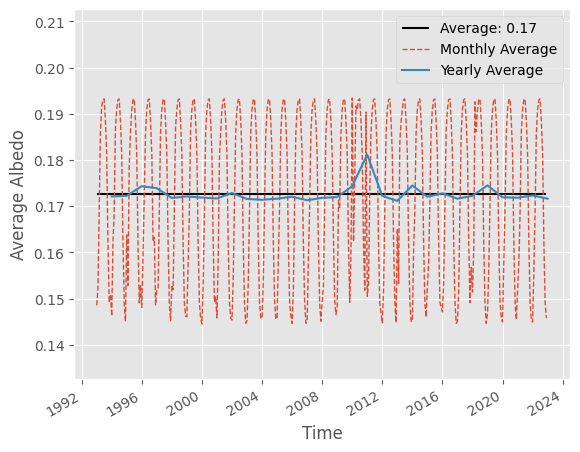

In [28]:
average_albedo = land_dataset.mean(dim=('longitude', 'latitude'))
resampled_albedo_yearly = average_albedo.resample(time='1Y').mean()

# Calculate and plot the average value
average_value = average_albedo.mean().values
plt.hlines(average_value, average_albedo.time.min(), average_albedo.time.max(), colors='k', label=f'Average: {average_value:.2f}')

# Plot the average albedo values
average_albedo.plot.line('--', label='Monthly Average', linewidth=1)
resampled_albedo_yearly.plot.line(label='Yearly Average', linestyle='-')

plt.ylim(average_albedo.mean()-0.04, average_albedo.mean()+.04)
plt.xlabel('Time')  
plt.ylabel('Average Albedo')
# plt.title('Average value over Ireland for the last 30 years')
plt.legend()
plt.savefig('../Figures/albedo_avg_clim.png')
plt.show()

In [11]:
average_albedo.max()

<xarray.DataArray 'fal' ()>
array(0.19342613, dtype=float32)

In [ ]:
# Close the dataset when you're done with it
dataset.close()